#Experiment 9                                                                                
 Mayur Hile                                                                      
21102A0017                                                                   
BE CMPN A

#Load and Explore the Dataset

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import pandas as pd

# Load the Digits dataset
digits = load_digits()

# Explore the dataset
print("Shape of the dataset:", digits.data.shape)
print("Number of classes:", len(digits.target_names))
print("Target labels:", digits.target_names)


Shape of the dataset: (1797, 64)
Number of classes: 10
Target labels: [0 1 2 3 4 5 6 7 8 9]


#Standardize the Data

In [2]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)


#Apply PCA

In [3]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # for 2D visualization
X_pca = pca.fit_transform(X_scaled)

# Cumulative explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component:", explained_variance)
print("Cumulative explained variance:", explained_variance.cumsum())


Explained variance by each component: [0.12033916 0.09561054]
Cumulative explained variance: [0.12033916 0.21594971]


#Reduce Dimensions and Visualize

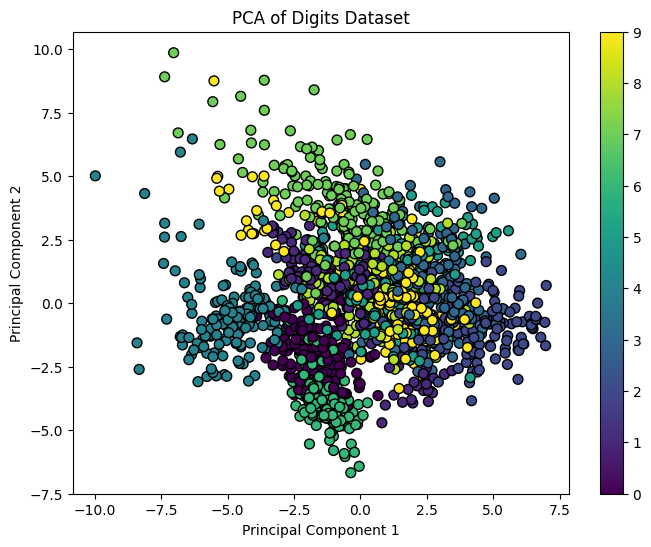

In [4]:
# Visualize the 2D projection
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Digits Dataset')
plt.colorbar(scatter)
plt.show()


#Analyze the Results

Number of components needed to explain 95% variance: 40


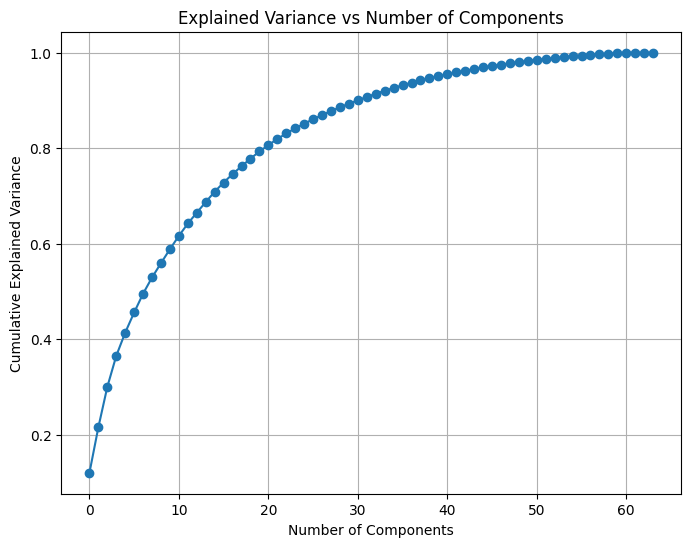

In [5]:
# Number of components needed to explain 95% variance
pca_full = PCA().fit(X_scaled)
cumulative_explained_variance = pca_full.explained_variance_ratio_.cumsum()
num_components = (cumulative_explained_variance < 0.95).sum() + 1
print(f"Number of components needed to explain 95% variance: {num_components}")

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()
